# Assignment 3 - EE18BTECH11050 

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Ques 1. 

In [106]:
from astroML.resample import bootstrap
from astroML.stats import median_sigmaG

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=False)

In [111]:
samples = 1000
bootstrap_samples = 10000

np.random.seed(123)
data = stats.norm(0, 1).rvs(samples)    #drawing 1000 samples from normal distribution

#drawing 10000 bootstrapped samples
median, sigmaG = bootstrap(data, bootstrap_samples, median_sigmaG, kwargs = dict(axis=1))
x = np.linspace(-2, 2, 5000)

sigma = np.sqrt(np.pi/(2.0*samples))
pdf = norm(np.mean(median), sigma).pdf(x)

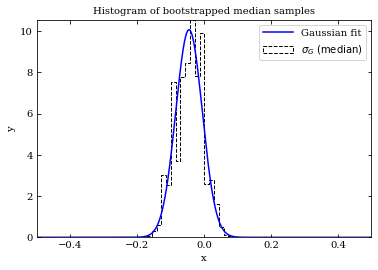

In [113]:
#plotting histogram of bootstrapped median samples and its gaussian fit
plt.figure()
#histogram
plt.hist(median, bins=20, density=True, histtype='step', color='black', ls='dashed', label=r'$\sigma_G\ {\rm (median)}$')
#gaussian fit
plt.plot(x, pdf, color='blue', label='Gaussian fit')
plt.xlim(-0.5,0.5)
plt.title('Histogram of bootstrapped median samples')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

### Ques 2.

In [114]:
#using the data from the paper from index 5 to 20

data = np.array([[5, 203, 495, 21, 5, -0.33],
[6, 58, 173, 15, 9, 0.67],
[7, 210, 479, 27, 4, -0.02],
[8, 202, 504, 14, 4, -0.05],
[9, 198, 510, 30, 11, -0.84],
[10, 158, 416, 16, 7, -0.69],
[11, 165, 393, 14, 5, 0.30],
[12, 201, 442, 25, 5, -0.46],
[13, 157, 317, 52, 5, -0.03],
[14, 131, 311, 16, 6, 0.50],
[15, 166, 400, 34, 6, 0.73],
[16, 160, 337, 31, 5, -0.52],
[17, 186, 423, 42, 9, 0.90],
[18, 125, 334, 26, 8, 0.40],
[19, 218, 533, 16, 6, -0.78],
[20, 146, 344, 22, 5, -0.56]])

print(data.shape)

x = data[:,1]
y = data[:,2]
sigma_y = data[:,3]
print(y.shape)
#print(x)
#print(sigma_y)

(16, 6)
(16,)


In [116]:
Y = y
A = np.ones((16,1))
A = np.concatenate((A, np.reshape(x, (16,1))), axis=1)
#print(A)

C = np.diagflat(sigma_y)
#print(C)

#defining X from eq (5) mentioned in paper
X = np.linalg.inv(np.transpose(A).dot(np.linalg.inv(C).dot(A))).dot(np.transpose(A).dot(np.linalg.inv(C).dot(Y)))
b, m = (X[0], X[1])
print('b =',b,'m =',m)
print(X)

b = 33.45048482976836 m = 2.2213630039593752
[33.45048483  2.221363  ]


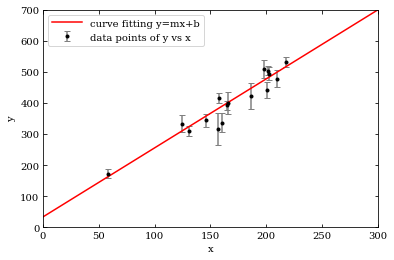

In [120]:
#Plotting the data points and the fitted line using the calculated parameters
xx = np.linspace(0,300,100)
yy = m*xx + b

plt.figure()
plt.errorbar(x, y, sigma_y, fmt='.k', ecolor='gray', label='data points of y vs x')
plt.plot(xx, yy, c='red', label='curve fitting y=mx+b')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,700)
plt.xlim(0,300)
plt.legend()
plt.show()

### Ques 3.

In [121]:
#Using the relation p_value = 1-stats.chi2(dof).cdf(chi2)
n = 50
m = 1
dof = n-m

p = []
chi2_dof = np.array([0.96, 0.24, 3.84, 2.85])   #chi2/dof from given graphs
chi2 = chi2_dof * dof   #chi2

for i in range(4):
    p_val = 1-stats.chi2(dof).cdf(chi2[i])
    p += [p_val]
    
print('p-values are ', p)

p-values are  [0.5529264339960218, 0.9999999917009567, 0.0, 1.2107292945984227e-10]
